In [1]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Ridge  # Linear Regression + L2 regularization
from sklearn.linear_model import Lasso  # Linear Regression + L1 regularization
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_error as mae

#import xgboost
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBRegressor
from xgboost import plot_importance  # to plot feature importance

# to save the final model on disk
from sklearn.externals import joblib

# Machine Learning Models
## Data Preparation

In [2]:
df = pd.read_csv("Files/stock_analytical_base_table.csv")
df.head()

,tx_price,beds,baths,sqft,lot_size,restaurants,groceries,cafes,shopping,arts_entertainment,...,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,0,107,9,19,89,6,...,0,0,1,0,0,1,0,0,1,0
1,240000,1,1,660,0,51,8,2,40,18,...,0,0,0,0,0,1,0,0,1,0
2,238600,1,1,834,0,45,12,11,28,7,...,0,0,0,0,0,1,0,0,1,0
3,371500,1,1,917,0,71,13,13,31,12,...,1,0,0,0,0,0,1,0,1,0
4,378000,1,1,961,0,54,8,3,48,16,...,0,0,1,0,0,1,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863 entries, 0 to 1862
Data columns (total 41 columns):
tx_price                                       1863 non-null int64
beds                                           1863 non-null int64
baths                                          1863 non-null int64
sqft                                           1863 non-null int64
lot_size                                       1863 non-null int64
restaurants                                    1863 non-null int64
groceries                                      1863 non-null int64
cafes                                          1863 non-null int64
shopping                                       1863 non-null int64
arts_entertainment                             1863 non-null int64
beauty_spas                                    1863 non-null int64
active_life                                    1863 non-null int64
median_age                                     1863 non-null float64
married             

In [4]:
print(df.shape)

(1863, 41)


###  Train and Test Splits
Separate your dataframe into separate objects for the target variable (y) and the input features (X) and perform the train and test split

In [5]:
# Create separate object for target variable
y = df.tx_price
# Create separate object for input features
X = df.drop('tx_price', axis=1)
y.head(10)

0    295850
1    240000
2    238600
3    371500
4    378000
5    455900
6    238900
7    285000
8    375500
9    275000
Name: tx_price, dtype: int64

In [6]:
# Split X and y into train and test sets: 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

Let's confirm we have the right number of observations in each subset.

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1490, 40) (373, 40) (1490,) (373,)


### Data standardization
* In Data Standardization we perform zero mean centring and unit scaling; i.e. we make the mean of all the features as zero and the standard deviation as 1.
* Thus we use **mean** and **standard deviation** of each feature.
* It is very important to save the **mean** and **standard deviation** for each of the feature from the **training set**, because we use the same mean and standard deviation in the test set.

In [8]:
train_mean = X_train.mean()
train_std = X_train.std()

In [9]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [10]:
## Check for mean and std dev.
X_train.describe()

,beds,baths,sqft,lot_size,restaurants,groceries,cafes,shopping,arts_entertainment,beauty_spas,...,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,...,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03
mean,8.941393e-17,-2.861246e-17,-3.099683e-17,-1.847888e-17,-8.345301e-17,-8.583738e-17,-1.311404e-17,-6.020538e-17,5.126399e-17,5.722492e-17,...,-5.960929e-17,1.430623e-17,-4.768743e-18,3.099683e-17,-3.934213e-17,4.172650e-17,-6.795459e-17,-2.145934e-17,3.576557e-17,-3.576557e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.246930e+00,-1.659039e+00,-1.375592e+00,-3.495308e-01,-8.595667e-01,-9.998129e-01,-7.046885e-01,-7.574438e-01,-7.234508e-01,-9.131834e-01,...,-2.011855e-01,-6.045445e-01,-2.623363e-01,-2.780578e-01,-1.337558e+00,-4.819414e-01,-2.608729e-01,-1.881954e-01,-8.721917e-01,-1.145767e+00
25%,-3.791890e-01,-5.898486e-01,-7.367561e-01,-3.074138e-01,-7.087046e-01,-7.792115e-01,-7.046885e-01,-6.288210e-01,-7.234508e-01,-7.566301e-01,...,-2.011855e-01,-6.045445e-01,-2.623363e-01,-2.780578e-01,-1.337558e+00,-4.819414e-01,-2.608729e-01,-1.881954e-01,-8.721917e-01,-1.145767e+00
50%,-3.791890e-01,4.793417e-01,-3.122790e-01,-1.902911e-01,-3.638770e-01,-3.380087e-01,-3.073178e-01,-3.532008e-01,-3.008114e-01,-3.261088e-01,...,-2.011855e-01,-6.045445e-01,-2.623363e-01,-2.780578e-01,7.471295e-01,-4.819414e-01,-2.608729e-01,-1.881954e-01,-8.721917e-01,8.721917e-01
75%,5.546814e-01,4.793417e-01,4.996638e-01,-3.138843e-02,3.904334e-01,5.443969e-01,9.005292e-02,1.796649e-01,3.331476e-01,4.957957e-01,...,-2.011855e-01,1.653028e+00,-2.623363e-01,-2.780578e-01,7.471295e-01,-4.819414e-01,-2.608729e-01,-1.881954e-01,1.145767e+00,8.721917e-01
max,1.488552e+00,3.686913e+00,4.285646e+00,1.191183e+01,4.873192e+00,4.294621e+00,5.520786e+00,5.489948e+00,6.672738e+00,5.936020e+00,...,4.967201e+00,1.653028e+00,3.809342e+00,3.593961e+00,7.471295e-01,2.073549e+00,3.830712e+00,5.310061e+00,1.145767e+00,8.721917e-01


In [11]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [12]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,beds,baths,sqft,lot_size,restaurants,groceries,cafes,shopping,arts_entertainment,beauty_spas,...,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,...,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,0.013888,0.066571,0.058472,0.011183,0.050459,-0.018048,0.019030,-0.025363,-0.017541,0.025821,...,-0.076479,-0.017455,0.021480,0.022984,0.031741,0.004492,-0.041485,-0.070270,-0.017399,0.017399
std,0.974312,0.964006,1.004367,0.920528,1.067369,0.965539,1.012606,0.934499,0.972949,1.056038,...,0.794147,0.991645,1.038243,1.038221,0.991067,1.004572,0.922928,0.797610,0.998468,0.998468
min,-2.246930,-1.659039,-1.286919,-0.349531,-0.859567,-0.999813,-0.704689,-0.757444,-0.723451,-0.913183,...,-0.201186,-0.604545,-0.262336,-0.278058,-1.337558,-0.481941,-0.260873,-0.188195,-0.872192,-1.145767
25%,-0.379189,-0.589849,-0.681624,-0.303179,-0.708705,-0.779212,-0.704689,-0.647196,-0.723451,-0.717492,...,-0.201186,-0.604545,-0.262336,-0.278058,-1.337558,-0.481941,-0.260873,-0.188195,-0.872192,-1.145767
50%,-0.379189,0.479342,-0.265243,-0.165977,-0.363877,-0.338009,-0.307318,-0.371576,-0.300811,-0.286970,...,-0.201186,-0.604545,-0.262336,-0.278058,0.747130,-0.481941,-0.260873,-0.188195,-0.872192,0.872192
75%,0.554681,0.479342,0.566747,-0.031388,0.433537,0.544397,0.222510,0.198040,0.121828,0.417519,...,-0.201186,1.653028,-0.262336,-0.278058,0.747130,-0.481941,-0.260873,-0.188195,1.145767,0.872192
max,1.488552,3.686913,3.685749,11.887363,3.709399,3.412215,4.461131,5.398074,6.250099,6.014297,...,4.967201,1.653028,3.809342,3.593961,0.747130,2.073549,3.830712,5.310061,1.145767,0.872192


##  Model 1 - Baseline Model
* In this model, for every test data point, we will simply predict the average of the train labels as the output.
* We will use this simple model to perform hypothesis testing for other complex models.

In [13]:
from sklearn.metrics import r2_score
## Predict Train results
y_train_pred = np.ones(y_train.shape[0])*y_train.mean()

In [14]:
## Predict Test results
y_pred = np.ones(y_test.shape[0])*y_train.mean()

In [15]:
print("Train Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Baseline Model:
*******************************
Root mean squared error:  150783.1184744958
R-squared:  0.0
Mean Absolute Error:  124203.40401243187


In [16]:
print("Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Results for Baseline Model:
*******************************
Root mean squared error:  155873.74482915542
R-squared:  -0.029678475594569154
Mean Absolute Error:  127022.97405401515


##  Model-2 Ridge Regression

In [17]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [18]:
model.best_estimator_

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [70]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [71]:
## Predict Test results
y_pred = model.predict(X_test)

In [21]:
print("Train Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Ridge Regression:
*******************************
Root mean squared error:  106251.60060914423
R-squared:  0.5034471029080058
Mean Absolute Error:  82933.33308648862


In [22]:
print("Test Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Ridge Regression:
*******************************
Root mean squared error:  133025.4155558507
R-squared:  0.250062718386319
Mean Absolute Error:  89428.24457414617


### Feature Importance

In [23]:
## Building the model again with the best hyperparameters
model = Ridge(alpha=100)
model.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [24]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
tax_and_insurance
treasury_1_year_bond
s&p_returns
consumer_price_index
college_grad
sqft
old_properties
beauty_spas
baths
lot_size
exterior_walls_Missing
cafes
restaurants
groceries
exterior_walls_Wood
exterior_walls_Brick veneer
beds
property_type_Single-Family
property_type_Apartment / Condo / Townhouse
property_age
active_life
exterior_walls_Brick
shopping
two_and_two
exterior_walls_Siding (Alum/Vinyl)
during_recession
median_age
married
roof_Shake Shingle
median_school
roof_Other
roof_Missing
school_score
exterior_walls_Combination
num_schools
exterior_walls_Other
roof_Composition Shingle
exterior_walls_Metal
roof_Asphalt
arts_entertainment


##  Model-3 Support Vector Regression
With an RBF Kernel

In [25]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(SVR(), tuned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)
## This takes around 20 minutes

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [26]:
model.best_estimator_

SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
## Building the model again with the best hyperparameters
model = SVR(C=100000, gamma=0.01)
model.fit(X_train, y_train)

SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [28]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [29]:
## Predict Test results
y_pred = model.predict(X_test)

In [30]:
print("Train Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Support Vector Regression:
*******************************
Root mean squared error:  90252.81454988025
R-squared:  0.6417253614690646
Mean Absolute Error:  64621.016425028225


In [31]:
print("Test Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Support Vector Regression:
*******************************
Root mean squared error:  99849.24734531439
R-squared:  0.5774819305814685
Mean Absolute Error:  74197.50891781115


#### Unfortunately getting feature importance from RBF SVM is non trivial

## Model-4 Random Forest Regression

In [32]:
## Reference for random search on random forest
## https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)
## This takes around 15 minutes

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [33]:
model.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [34]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [35]:
## Predict Test results
y_pred = model.predict(X_test)

In [36]:
print("Train Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Random Forest Regression:
*******************************
Root mean squared error:  25675.769779985356
R-squared:  0.9710037721497643
Mean Absolute Error:  18846.251083892617


In [37]:
print("Test Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Random Forest Regression:
*******************************
Root mean squared error:  70820.565461782
R-squared:  0.7874434581922324
Mean Absolute Error:  51912.609075067034


### Feature Importance

In [38]:
## Building the model again with the best hyperparameters
model = RandomForestRegressor(n_estimators=200, min_samples_split=10, min_samples_leaf=2)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [39]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
tax_and_insurance
treasury_1_year_bond
consumer_price_index
s&p_returns
sqft
property_age
college_grad
lot_size
median_age
active_life
married
shopping
median_school
baths
restaurants
beauty_spas
school_score
groceries
arts_entertainment
exterior_walls_Missing
cafes
old_properties
beds
roof_Missing
exterior_walls_Brick
roof_Other
roof_Composition Shingle
exterior_walls_Siding (Alum/Vinyl)
num_schools
during_recession
roof_Asphalt
exterior_walls_Metal
exterior_walls_Other
roof_Shake Shingle
property_type_Apartment / Condo / Townhouse
property_type_Single-Family
exterior_walls_Brick veneer
two_and_two
exterior_walls_Combination
exterior_walls_Wood


## Model-5 XGBoost Regression

In [40]:
## Reference for random search on xgboost
## https://gist.github.com/wrwr/3f6b66bf4ee01bf48be965f60d14454d
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [41]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=0.001, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [42]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [43]:
## Predict Test results
y_pred = model.predict(X_test)

In [44]:
print("Train Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for XGBoost Regression:
*******************************
Root mean squared error:  29666.031117319406
R-squared:  0.9612908661523131
Mean Absolute Error:  22572.0700817953


In [45]:
print("Test Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for XGBoost Regression:
*******************************
Root mean squared error:  70613.82538417575
R-squared:  0.7886826410440766
Mean Absolute Error:  51943.353007707774


### Feature Importance

In [76]:
## Building the model again with the best hyperparameters
model = XGBRegressor(max_depth=2,learning_rate=0.05,n_estimators=400, reg_lambda=0.001)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=0.001, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [77]:
## Function to include figsize parameter
## Reference: https://stackoverflow.com/questions/40081888/xgboost-plot-importance-figure-size
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

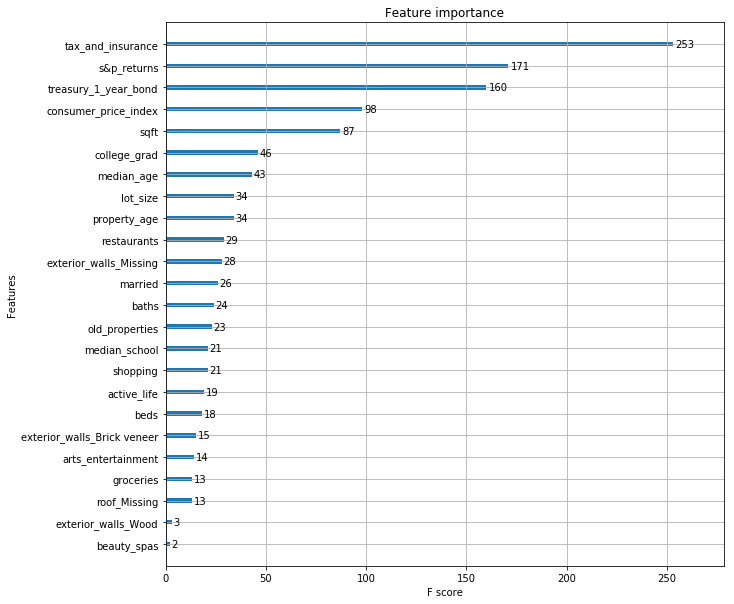

In [78]:
my_plot_importance(model, (10,10))


## Model-6 Lasso Regression

In [49]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Lasso(), tuned_params, scoring = 'neg_mean_absolute_error', cv=20, n_jobs=-1)
model.fit(X_train, y_train)

C:\Users\muhli\Miniconda3\envs\pythonData\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=20, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [50]:
model.best_estimator_

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [52]:
## Predict Test results
y_pred = model.predict(X_test)

In [53]:
print("Train Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Lasso Regression:
*******************************
Root mean squared error:  106249.09139344805
R-squared:  0.5034705556109124
Mean Absolute Error:  82879.28410467804


In [54]:
print("Test Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Lasso Regression:
*******************************
Root mean squared error:  134108.14847289774
R-squared:  0.2378051169921359
Mean Absolute Error:  89513.92117690612


### Feature Importance

In [55]:
## Building the model again with the best hyperparameters
model = Lasso(alpha=1000)
model.fit(X_train, y_train)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
tax_and_insurance
treasury_1_year_bond
s&p_returns
consumer_price_index
college_grad
old_properties
sqft
property_type_Apartment / Condo / Townhouse
beauty_spas
restaurants
lot_size
baths
groceries
exterior_walls_Wood
exterior_walls_Brick veneer
exterior_walls_Missing
exterior_walls_Brick
two_and_two
beds
during_recession
median_school
median_age
roof_Other
roof_Shake Shingle
property_age
exterior_walls_Siding (Alum/Vinyl)
active_life
cafes
exterior_walls_Other
shopping
property_type_Single-Family
exterior_walls_Metal
exterior_walls_Combination
arts_entertainment
roof_Asphalt
roof_Composition Shingle
roof_Missing
school_score
married
num_schools


## Model-7 Descision Tree Regression

In [57]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model = RandomizedSearchCV(DecisionTreeRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [58]:
model.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=6,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [59]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [60]:
## Predict Test results
y_pred = model.predict(X_test)

In [61]:
print("Train Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Decision Tree Regression:
*******************************
Root mean squared error:  64188.757491056116
R-squared:  0.8187773419753973
Mean Absolute Error:  47475.54341627455


In [62]:
print("Test Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Decision Tree Regression:
*******************************
Root mean squared error:  83233.46927543837
R-squared:  0.7064029486686448
Mean Absolute Error:  61924.68516292056


## Model-8 KN Regression

In [63]:
# creating odd list of K for KNN
neighbors = list(range(1,50,2))
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 7.


In [64]:
model = KNeighborsRegressor(n_neighbors = optimal_k)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=7, p=2,
          weights='uniform')

In [65]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [66]:
## Predict Test results
y_pred = model.predict(X_test)

In [67]:
print("Train Results for KN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for KN Regression:
*******************************
Root mean squared error:  104363.72978650536
R-squared:  0.520935774074762
Mean Absolute Error:  80054.9389261745


In [68]:
print("Test Results for KN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for KN Regression:
*******************************
Root mean squared error:  122805.56863982206
R-squared:  0.36086615431653846
Mean Absolute Error:  95013.06089620835


## Compare all models

![title](Images/result_after.png)



**From the above table, RMSE, R-squared, MAE for Xgboost Regression and Rendom Forest Regressor are better(i.e RMSE and MAE is least and R-squared is more) than other models so Xgboost is the winning Model**

# Save the winning model to disk

In [69]:
win_model = RandomForestRegressor(n_estimators=200, min_samples_split=10, min_samples_leaf=2)
win_model.fit(X_train, y_train)
with open('rfr_real_estate.pkl', 'wb') as pickle_file:
       joblib.dump(win_model, 'rfr_real_estate.pkl') 